<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: An introduction to random forests 
© ExploreAI Academy

In this notebook, we look at a specific ensemble learning technique, the random forest. This algorithm is the combination of multiple decision trees. We'll examine how we can implement these models in Python using the `sklearn` library and also how random forests contribute to understanding the importance of predictive variables within a dataset.


## Learning Objectives

* Understand how random forests differ from decision trees.
* Understand the training process of random forests and how we can use them to make predictions.
* Know how to build a random forest regression model.
* Understand how to use random forests to assess predictive variable importance.


## 1. Introduction to random forests

### Overfitting in decision trees

Overfitting is a risk when working with decision trees - it is easy to for the tree to become too complex, and thus fit details of the individual data points rather than the overall properties of the distributions they are drawn from. 

This issue can be addressed by using **random forests**.

### What is ensemble learning?

Ensemble learning in machine learning is the practice of **combining multiple models** to try and achieve higher overall model performance. 

In general, ensembles consist of multiple **heterogeneous or homogeneous** models trained on the same dataset. 

Each of these models is used to make predictions using input (either exactly the same, or samples out of the same data), then  **aggregated** across all models in some way (e.g. by taking the mean or having a weighted mean) to produce the final output. 

The  **`random forest`** is an example of a commonly used ensemble model.

### What is a random forest?

A random forest is a powerful non-parametric algorithm and an **ensemble** method **built on decision trees**, meaning that it relies on aggregating the results of an ensemble of decision trees. 

The ensembled trees are **randomized** and the output is the **aggregated prediction** of the individual trees.

*The mean prediction is used for a regression problem while classification problems use the mode of the ensembled trees as opposed to the mean.*

## 2. How do random forests work?

### Fitting the data:

Keep in mind that `N` refers to the **number of observations** (rows) in the training dataset, and `p` is the **number of predictor variables** (columns). The following is the typical algorithm for a random forest:

1. **Bootstrapping**: Drawing *with replacement* from the training dataset, randomly sampled `N` observations.
<br>

2. Use the `N` observations to **grow a random forest tree** as follows:<br>
_<br>
At each node:<br>
i. Select a random subset, `m`, of predictor variables, where $m<\sqrt{p}$.<br>
ii. Pick the best variable/split-point among the selected predictor variables.<br>
iii. Divide data into two subsets based on the selected split.<br>
iv. Repeat until stopping criteria satisfied (e.g. minimum node sample size reached)._
<br>

3. Repeat until **desired number of random forest trees** is reached.

Since we draw randomly, with replacement, from the training data during the bootstrapping step it is possible that:
- Some data **samples get resampled** and thus reused when fitting different trees in the random forest;
- Some data **samples don't get sampled at all** and thus do not get used in fitting the random forest.

This means that the **dataset each tree is grown on** is **slightly different**, so random forests are **less likely to overfit** than decision trees.

### Making predictions:

Random forests **combine multiple trees to make a prediction** as follows:

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/random_forest.png">

The somewhat surprising result with such ensemble methods is that the sum can be greater than the parts: that is, a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting! (An estimator is a tree.)

## 3. Building a random forest regression model

Now that we have an understanding of how random forests work, let's **implement** one **using `scikit-learn`**.   

### Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/house_price_by_area.csv")
df.head()

,LotArea,SalePrice
0,138,1204000
1,145,1274000
2,152,1673000
3,152,1232000
4,152,1195600


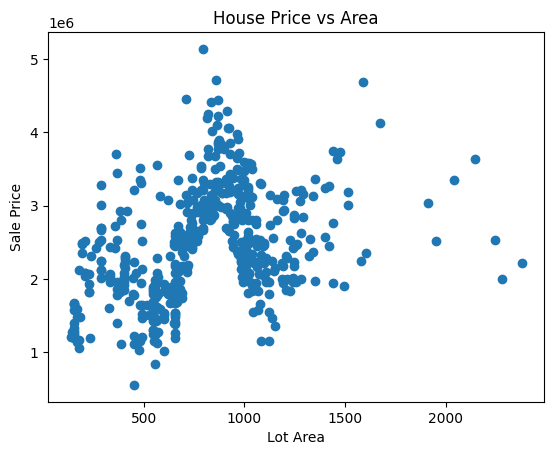

In [3]:
# Plotting the data

X = df["LotArea"] # independent variable 
y = df["SalePrice"] # dependent variable 

plt.scatter(X,y) # create scatter plot
plt.title("House Price vs Area")
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.show()

### Preprocessing

In [9]:
# standardize features
scaler = StandardScaler()
# Convert to numpy array first to apply np.newaxis
X_scaled = scaler.fit_transform(np.array(X)[:,np.newaxis])

# Train test split
x_train, x_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=6)

### Training

This process of fitting a decision tree to our data can be done in `Scikit-Learn` with the ``RandomForestRegressor`` estimator:

As with decision trees, random forests also have hyperparameters, some of the more important ones include:

- **n_estimators**: The number of trees to include in the forest.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node.
- **max_depth**: The maximum depth of each forest tree (i.e. the number of nodes between root and leaf node).
- **random_state**: A number used to seed the random number generator. Ensures that we get the same tree each time we call model.fit() - _this particular hyperparameter is important in random forests since their training procedure is inherently random._
- **criterion**: The function to measure the quality of a split. The model uses the Mean Square Error (mse) by default.

> To learn more about other RandomForestRegressor hyperparameters, run `help(RandomForestRegressor)` in a new cell.

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

### Testing

To evaluate the performance of our model, we can report the **mean squared error** or **plot** predicted output vs expected output.

In [11]:
# Get predictions
y_pred = RF.predict(x_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 594293.2879098818


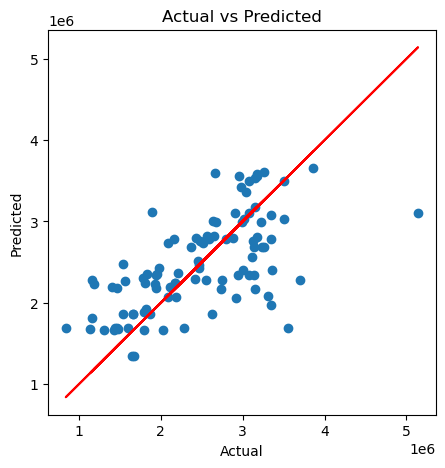

In [12]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot actual vs predicted values on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()

### Tuning Model Hyperparameters 

In most cases, the default hyperpameter values do not offer the best model performance. In such cases, we have to **tune model hyperparameters** to **yield the the best performing model**.

Let's make some changes to the `n_estimators` parameter and compare the results:

#### Training the various models:

In [13]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=5, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23)

In [14]:
forest_1.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=2, random_state=23)

In [15]:
forest_2.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=23)

In [16]:
forest_3.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=23)

#### Let's evaluate the models:

We calculate the RMSE for each model and plot the actual vs predicted values:

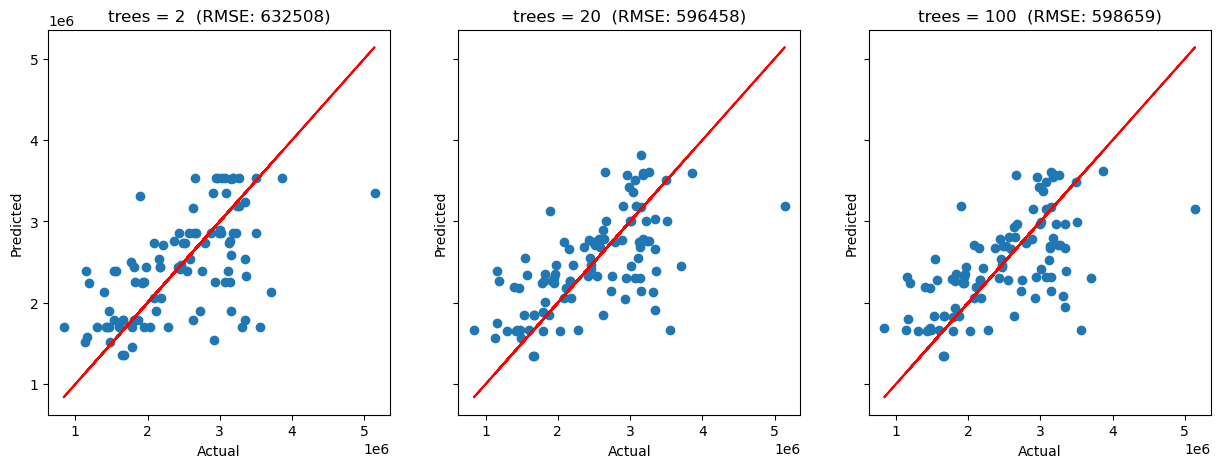

In [17]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_1.predict(x_test), forest_2.predict(x_test), forest_3.predict(x_test)]
title = ['trees = 2', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

Looking at the RMSEs, the forest with 20 trees performed the best. 

> Can you find the optimal parameters (including `max_depth` and `min_samples_leaf`)?

## 4. Assessing variable importance

Knowing the **predictive power** - how different predictive variables affect the model's performance - can prove useful in cases where the dataset is large and high-dimensional. 

It allows us to establish **which predictive variables we can discard** without significantly affecting the model's performance. Additionally, models that are presented with fewer predictor variables tend to train faster.  

Unlike decision trees, random forests can be used to calculate a **measure of predictor variable importance**. 

One way to compute this measure in the regression setting is to use the training data that was left out when constructing the random forest. Then the variable importance for a given variable can be calculated by:

1. Keeping other variables the same;
2. Shuffling the value of the variable in question;
3. Calculating the percentage increase in MSE.  

This way, **more important variables** will have **higher percentage increases** in the MSE.

In Sklearn's `RandomForestRegressor`, we can easily obtain variable importances using:
    `model.feature_importances_`

## 5. Advantages & disadvantages of random forests

**Advantages:**

* Less overfitting compared to a single decision tree (i.e. generalizes much better).
* Requires little data preparation - e.g. no real need to standardize features.
* Extremely flexible and usually have high prediction accuracy.

**Disadvantages**

* Complex and not very intuitive.
* Computation cost can be high if many trees are used.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>